# Editing entities for NFDI consortia using Wikidata GUI
Only registered users can create and edit entities at Wikidata. An account can be created by filling [the form](https://www.wikidata.org/w/index.php?title=Special:CreateAccount&returnto=Wikidata%3AAccount+creators). Then check any existing page, you'll see the `edit` button. Make proper edits and press `publish`. That's it.

We started to search over Wikidata ([API](https://www.wikidata.org/wiki/Special:Search) and [SPARQL](https://query.wikidata.org)) and found that only the 2020 NFDI consortia have Wikidata pages. Then we created pages for new 2021 consortia (except of MaRDI which already existed) and edited also the pages for 2020 consortia. See our edits on [14-15.09.2021](https://www.wikidata.org/w/index.php?target=RShigapov&namespace=all&tagfilter=&start=2021-09-14&end=2021-09-15&limit=500&title=Special%3AContributions). The same schema as for the first year consortia was used. Now all funded consortia have basic info about them at Wikidata. Let's check the CSV-file saved using the [frontend for the Wikidata SPARQL endpoint](https://query.wikidata.org).

In [1]:
import pandas as pd
df = pd.read_csv("../../../data/wikidata_manual_edits.csv")
df

,Wikidata,Consortium,GEPRIS,City,Twitter,GitHub,YouTube,Inception,Homepage
0,http://www.wikidata.org/entity/Q98380344,NFDI4Ing,442146713,Aachen,NFDI4Ing,NaN,NaN,2020-10-01T00:00:00Z,https://nfdi4ing.de
1,http://www.wikidata.org/entity/Q99534506,NFDI4Microbiota,460129525,Cologne,nfdi4microbiota,NaN,NaN,2021-10-01T00:00:00Z,https://nfdi4microbiota.de/
2,http://www.wikidata.org/entity/Q108327788,MaRDI,460135501,Berlin,mardi4nfdi,NaN,NaN,2021-10-01T00:00:00Z,https://www.mardi4nfdi.de
3,http://www.wikidata.org/entity/Q108542181,BERD@NFDI,460037581,Mannheim,BERD_NFDI,NaN,NaN,2021-10-01T00:00:00Z,https://www.berd-nfdi.de
4,http://www.wikidata.org/entity/Q108542327,DAPHNE4NFDI,460248799,Hamburg,NaN,NaN,NaN,2021-10-01T00:00:00Z,https://www.sni-portal.de/de/daphne-nfdi/daphn...
5,http://www.wikidata.org/entity/Q108542373,FAIRmat,460197019,Berlin,FAIRmat_NFDI,NaN,NaN,2021-10-01T00:00:00Z,https://www.fair-di.eu/fairmat/fairmat_/consor...
6,http://www.wikidata.org/entity/Q108542422,NFDI4DataScience,460234259,Munich,nfdi4ds,NaN,NaN,2021-10-01T00:00:00Z,https://www.nfdi4datascience.de
7,http://www.wikidata.org/entity/Q108542504,NFDI4Earth,460036893,Dresden,nfdi4earth,NaN,NaN,2021-10-01T00:00:00Z,https://www.nfdi4earth.de
8,http://www.wikidata.org/entity/Q108542607,NFDI-MatWerk,460247524,Munich,NMatwerk,NaN,NaN,2021-10-01T00:00:00Z,https://nfdi-matwerk.de
9,http://www.wikidata.org/entity/Q108542637,PUNCH4NFDI,460248186,Hamburg,Punch4NFDI,NaN,NaN,2021-10-01T00:00:00Z,https://www.punch4nfdi.de


Prepare dataframe for vizualization:

In [2]:
dfm = df.drop(columns=['Consortium', 'City']).groupby('Inception').count().stack().reset_index().rename(columns={'level_1': 'Resource', 0: 'Count'})
dfm['Inception'] = dfm['Inception'].apply(lambda x: x[0:4])
dfm

,Inception,Resource,Count
0,2020,Wikidata,9
1,2020,GEPRIS,9
2,2020,Twitter,9
3,2020,GitHub,5
4,2020,YouTube,2
5,2020,Homepage,9
6,2021,Wikidata,10
7,2021,GEPRIS,10
8,2021,Twitter,9
9,2021,GitHub,0


Make a figure

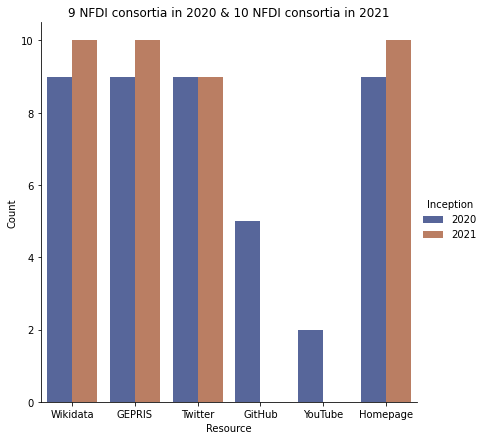

In [3]:
import seaborn as sns
g = sns.catplot(
    data=dfm, kind="bar",
    x="Resource", y="Count", hue="Inception",
    ci="sd", palette="dark", alpha=.7, height=6
).ax.set_title('9 NFDI consortia in 2020 & 10 NFDI consortia in 2021')

All funded NFDI consortia have Wikidata and GEPRIS pages as well as homepages. Only one 2021 NFDI consortium does not have a Twitter account. Only four 2020 NFDI consortia have GitHub accounts. Only two 2020 NFDI consortia have YouTube accounts. 2021 NFDI consortia do not have GitHub and YouTube accounts.